In [9]:
from ppget.source import ModelSource
import matplotlib as mplt
mplt.rcParams["figure.figsize"] = (20,5)

start_date = "2007-07-01"
end_date = "2007-07-08"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: H, Name: Global_active_power, dtype: float64)

In [10]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.493733
2007-07-01 01:00:00    0.990900
2007-07-01 02:00:00    0.789900
2007-07-01 03:00:00    0.287467
2007-07-01 04:00:00    0.515533
Freq: H, Name: Global_active_power, dtype: float64

In [11]:
import pandas as pd
from sklearn.cluster import KMeans

kw_hour = pd.DataFrame(zip(list(series.values),list(series.index.hour)))
kw_hour.columns = ["kw", "hour"]
kmeans = KMeans(n_clusters=4).fit(kw_hour)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.38437381 20.5       ]
 [ 0.76798651  8.5       ]
 [ 0.34350079 14.5       ]
 [ 0.49701111  2.5       ]]


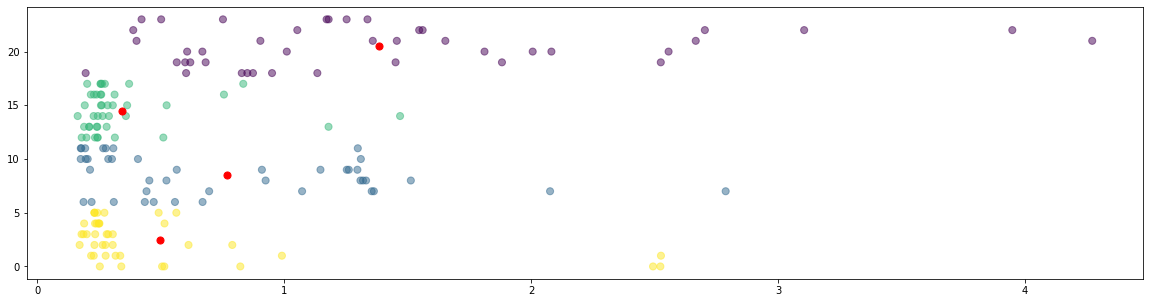

In [12]:
import matplotlib.pyplot as plt

plt.scatter(kw_hour["kw"], kw_hour["hour"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [13]:
kw_day = pd.DataFrame(zip(list(series.values),list(series.index.dayofweek)))
kw_day.columns = ["kw", "day_of_week"]
kmeans = KMeans(n_clusters=7).fit(kw_day)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.46284651 0.51162791]
 [0.63553623 6.        ]
 [1.71976667 2.61538462]
 [0.41453627 4.41176471]
 [2.776      0.4       ]
 [1.92411111 4.8       ]
 [0.34251524 2.45714286]]


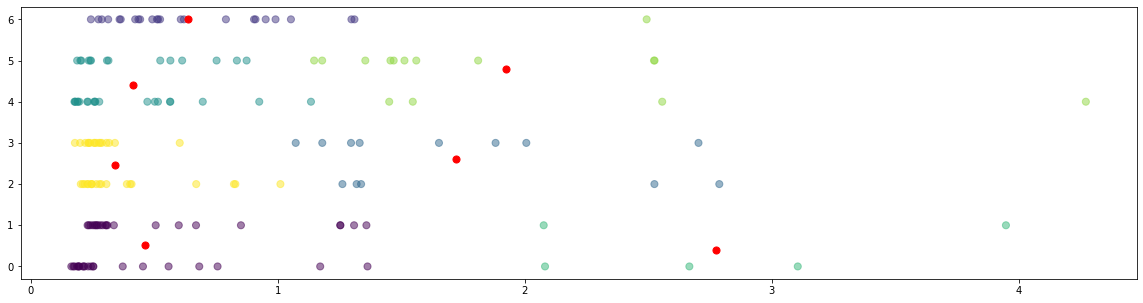

In [14]:
plt.scatter(kw_day["kw"], kw_day["day_of_week"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [15]:
kw_time = pd.DataFrame(zip(list(series.values),list(series.index.hour),list(series.index.dayofweek)))
kw_time.columns = ["kw", "hour", "day"]
kmeans = KMeans(n_clusters=4).fit(kw_time)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.34350079 14.5         3.        ]
 [ 0.49701111  2.5         3.        ]
 [ 1.38437381 20.5         3.        ]
 [ 0.76798651  8.5         3.        ]]


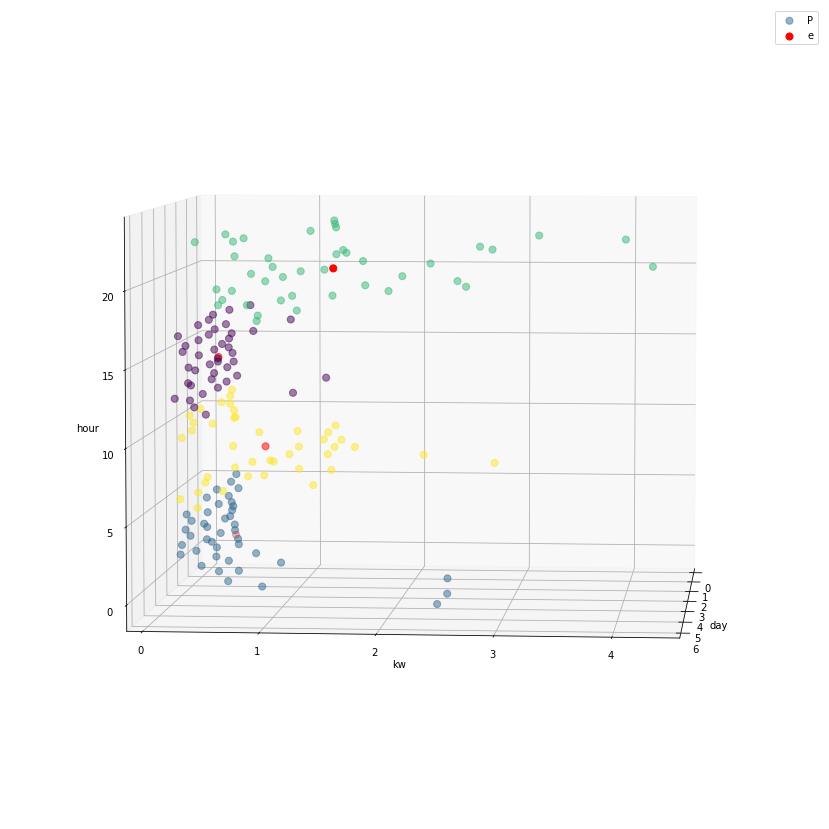

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kw_time["day"], kw_time["kw"], kw_time["hour"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centroids[:, 2], centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('day')
ax.set_ylabel('kw')
ax.set_zlabel('hour')
ax.legend("Period Cluster")
ax.view_init(5, 5)
plt.show()